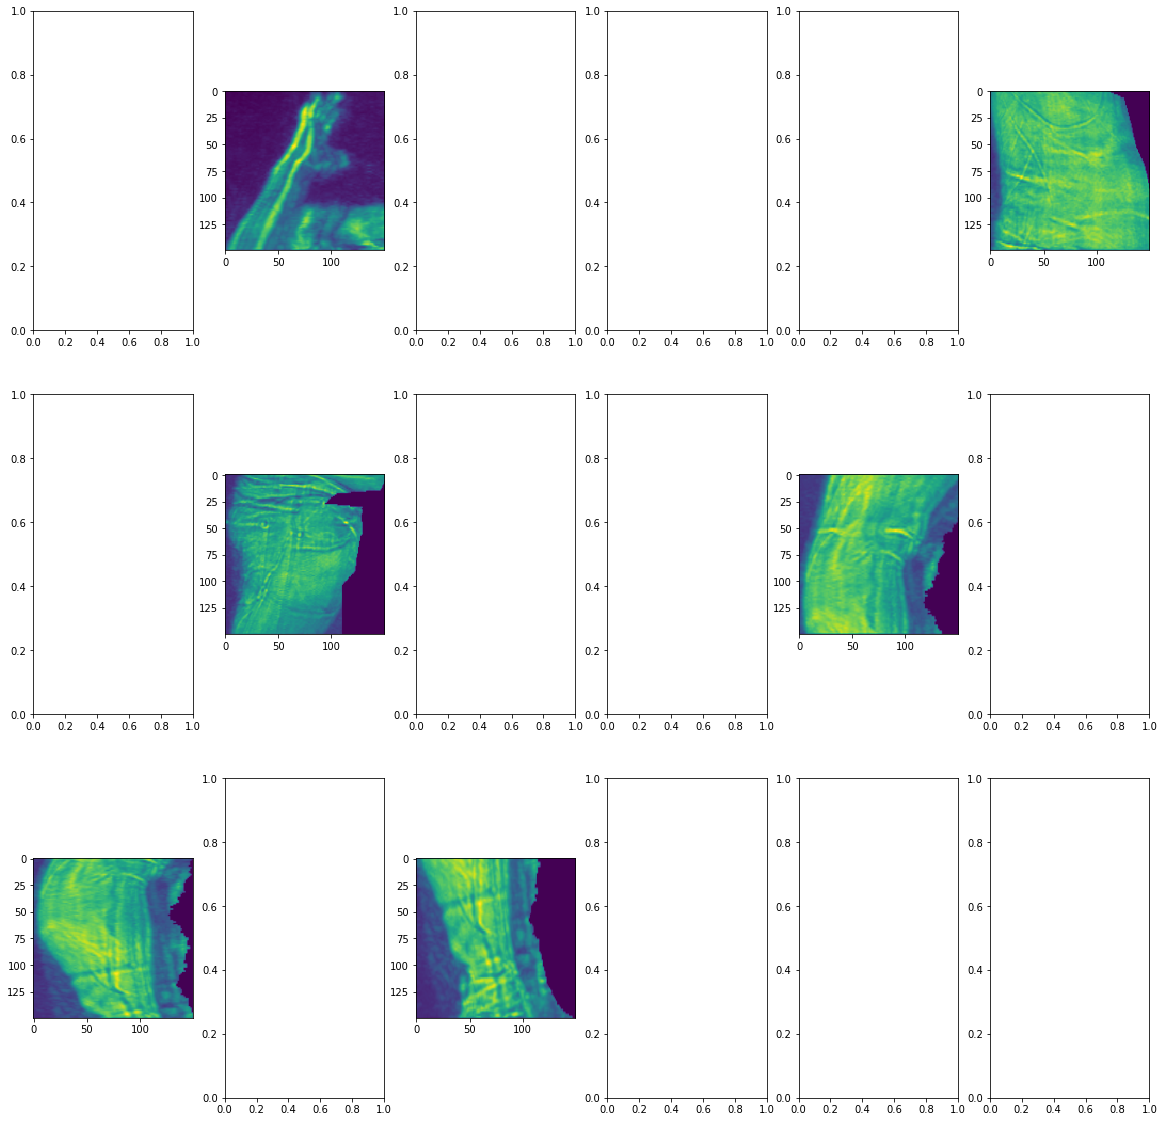

In [14]:
ii = 50
fig, axes = plt.subplots(3, 6, figsize = (20, 20))
ax = axes.ravel()
for jj in range(17):
    if image_zone_list_all[ii][jj] is not None:
        ax[jj].imshow(image_zone_list_all[ii][jj])

plt.show()    

In [ ]:
# given figures, how could you make them into the same shape?
